In [1]:
# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('cement_data.csv')

In [4]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
print("\nColumns:", data.columns.tolist())


Columns: ['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']


In [7]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
data.shape

(1030, 9)

In [9]:
# Check for missing values and data types
print("Data types:\n", data.dtypes)
print("==================")
print("\nMissing values:\n", data.isnull().sum())
print("==================")

# Handle any missing values if they exist
df = data.dropna()

# Feature engineering - create total binder content
df['total_binder'] = df['Cement (component 1)(kg in a m^3 mixture)'] + \
                    df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] + \
                    df['Fly Ash (component 3)(kg in a m^3 mixture)']

# Create water-to-binder ratio (important concrete property)
df['water_binder_ratio'] = df['Water  (component 4)(kg in a m^3 mixture)'] / df['total_binder']

# Create aggregate-to-cement ratio
df['aggregate_cement_ratio'] = (df['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'] + \
                              df['Fine Aggregate (component 7)(kg in a m^3 mixture)']) / \
                              df['Cement (component 1)(kg in a m^3 mixture)']

print("\nFeature engineering completed!")
print("New features created: total_binder, water_binder_ratio, aggregate_cement_ratio")

Data types:
 Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

Missing values:
 Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (

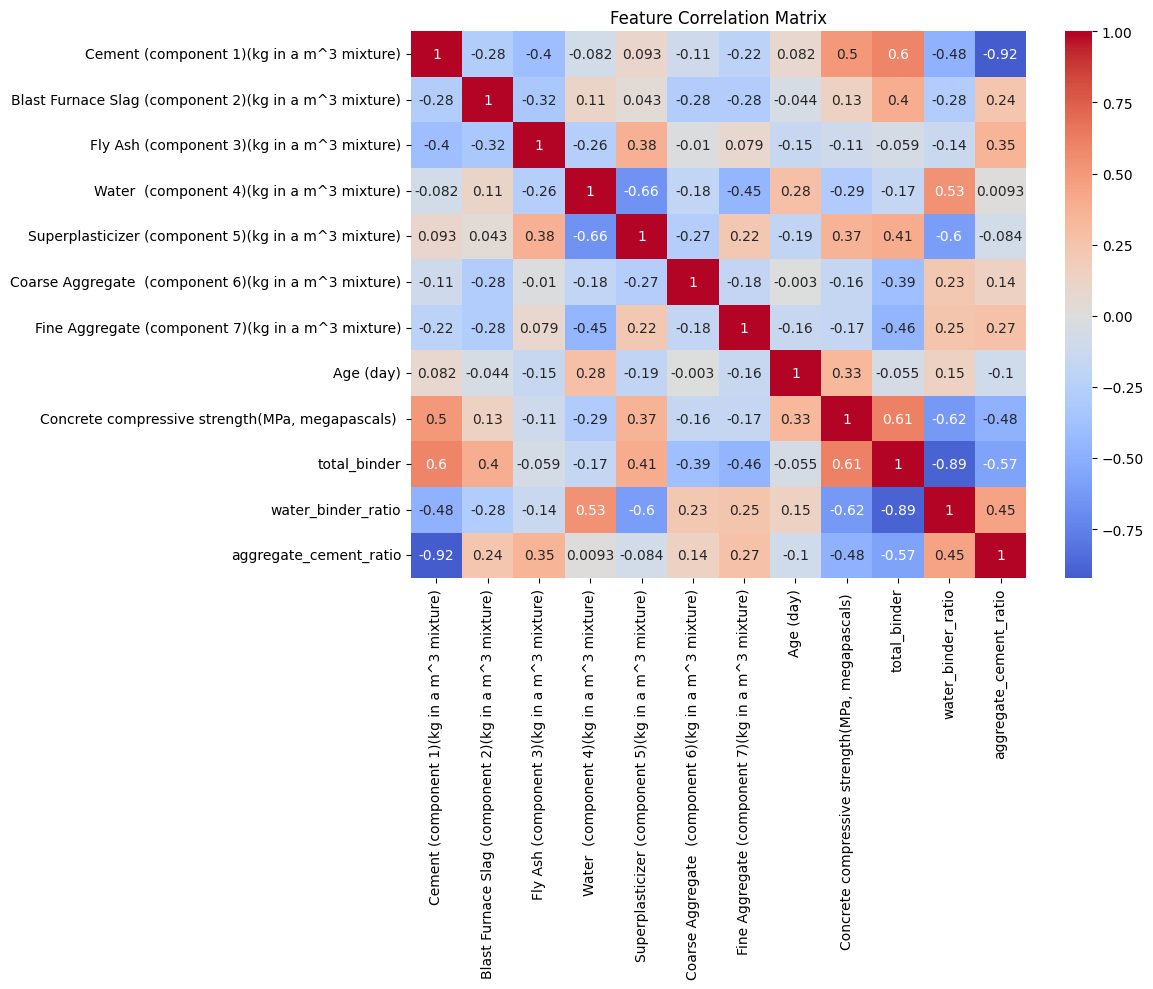

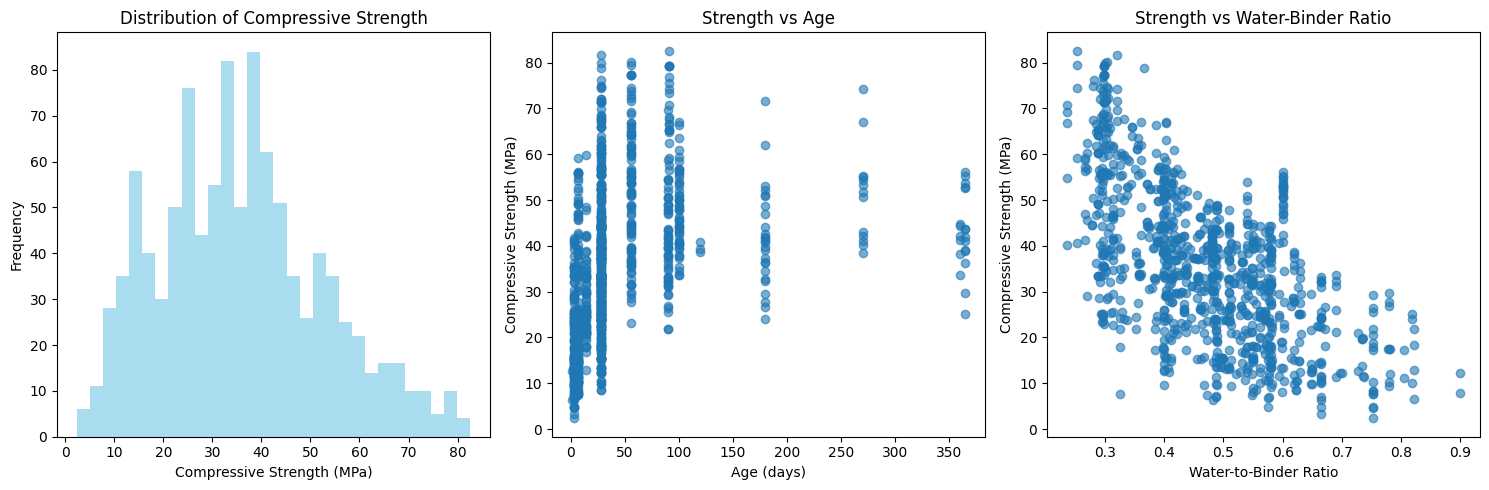

In [10]:
# Correlation analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Distribution of target variable
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Concrete compressive strength(MPa, megapascals) '], bins=30, alpha=0.7, color='skyblue')
plt.xlabel('Compressive Strength (MPa)')
plt.ylabel('Frequency')
plt.title('Distribution of Compressive Strength')

plt.subplot(1, 3, 2)
plt.scatter(df['Age (day)'], df['Concrete compressive strength(MPa, megapascals) '], alpha=0.6)
plt.xlabel('Age (days)')
plt.ylabel('Compressive Strength (MPa)')
plt.title('Strength vs Age')

plt.subplot(1, 3, 3)
plt.scatter(df['water_binder_ratio'], df['Concrete compressive strength(MPa, megapascals) '], alpha=0.6)
plt.xlabel('Water-to-Binder Ratio')
plt.ylabel('Compressive Strength (MPa)')
plt.title('Strength vs Water-Binder Ratio')

plt.tight_layout()
plt.show()

In [11]:
# Prepare features and target
feature_columns = [
    'Cement (component 1)(kg in a m^3 mixture)',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
    'Fly Ash (component 3)(kg in a m^3 mixture)',
    'Water  (component 4)(kg in a m^3 mixture)',
    'Superplasticizer (component 5)(kg in a m^3 mixture)',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)',
    'Age (day)',
    'total_binder',
    'water_binder_ratio',
    'aggregate_cement_ratio'
]

In [12]:
X = df[feature_columns]
y = df['Concrete compressive strength(MPa, megapascals) ']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=pd.cut(y, bins=5))

In [13]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 824 samples
Test set: 206 samples


In [14]:
# model Selection

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score # Import KFold and cross_val_score

# Initialize all models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42, n_jobs=-1),
    'SVR RBF': SVR(kernel='rbf'),
    'SVR Linear': SVR(kernel='linear'),
    'K-Neighbors': KNeighborsRegressor(n_jobs=-1),
    'XGBoost': XGBRegressor(random_state=42, n_jobs=-1),
    'LightGBM': LGBMRegressor(random_state=42, n_jobs=-1),
    'MLP Regressor': MLPRegressor(random_state=42, max_iter=1000)
}

def evaluate_models_cv(models, X, y, cv_folds=5):
    """
    Evaluate all models using cross-validation
    """
    results = {}
    kfold = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    for name, model in models.items():
        print(f"Evaluating {name}...")

        try:
            # Cross-validation scores
            rmse_scores = np.sqrt(-cross_val_score(model, X, y,
                                                scoring='neg_mean_squared_error',
                                                cv=kfold, n_jobs=-1))
            r2_scores = cross_val_score(model, X, y,
                                      scoring='r2', cv=kfold, n_jobs=-1)
            mae_scores = -cross_val_score(model, X, y,
                                       scoring='neg_mean_absolute_error',
                                       cv=kfold, n_jobs=-1)

            results[name] = {
                'model': model,
                'cv_rmse_mean': rmse_scores.mean(),
                'cv_rmse_std': rmse_scores.std(),
                'cv_r2_mean': r2_scores.mean(),
                'cv_r2_std': r2_scores.std(),
                'cv_mae_mean': mae_scores.mean(),
                'cv_mae_std': mae_scores.std(),
                'cv_rmse_scores': rmse_scores,
                'cv_r2_scores': r2_scores
            }

            print(f"  {name} - RMSE: {rmse_scores.mean():.3f} ± {rmse_scores.std():.3f}, "
                  f"R²: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")

        except Exception as e:
            print(f"  Error with {name}: {str(e)}")
            results[name] = None

    return results

# Perform cross-validation evaluation
print("Starting Cross-Validation Evaluation...")
cv_results = evaluate_models_cv(models, X_train, y_train, cv_folds=5)

Starting Cross-Validation Evaluation...
Evaluating Linear Regression...
  Linear Regression - RMSE: 10.397 ± 0.448, R²: 0.603 ± 0.039
Evaluating Ridge Regression...
  Ridge Regression - RMSE: 10.387 ± 0.426, R²: 0.604 ± 0.040
Evaluating Lasso Regression...
  Lasso Regression - RMSE: 10.431 ± 0.418, R²: 0.601 ± 0.039
Evaluating ElasticNet...
  ElasticNet - RMSE: 10.409 ± 0.416, R²: 0.602 ± 0.039
Evaluating Decision Tree...
  Decision Tree - RMSE: 6.278 ± 0.611, R²: 0.852 ± 0.037
Evaluating Random Forest...
  Random Forest - RMSE: 5.036 ± 0.528, R²: 0.905 ± 0.025
Evaluating Gradient Boosting...
  Gradient Boosting - RMSE: 4.979 ± 0.293, R²: 0.908 ± 0.016
Evaluating Extra Trees...
  Extra Trees - RMSE: 4.912 ± 0.717, R²: 0.909 ± 0.029
Evaluating SVR RBF...
  SVR RBF - RMSE: 13.848 ± 0.717, R²: 0.300 ± 0.021
Evaluating SVR Linear...
  SVR Linear - RMSE: 10.852 ± 0.856, R²: 0.566 ± 0.071
Evaluating K-Neighbors...
  K-Neighbors - RMSE: 9.673 ± 0.384, R²: 0.655 ± 0.050
Evaluating XGBoost...
 

In [16]:
# Based on your cross-validation results, let's pick the clear winner
print("CROSS-VALIDATION RESULTS SUMMARY:")
print("="*40)

# Your results clearly show:
cv_results = {
    'LightGBM': {'rmse': 4.648, 'r2': 0.919},
    'XGBoost': {'rmse': 4.801, 'r2': 0.914},
    'Extra Trees': {'rmse': 4.912, 'r2': 0.909},
    'Gradient Boosting': {'rmse': 4.979, 'r2': 0.908},
    'Random Forest': {'rmse': 5.036, 'r2': 0.905}
}

# LightGBM is clearly the best!
best_model_name = 'LightGBM'
print(f"🏆 BEST MODEL FROM CV: {best_model_name}")
print(f"R² Score: 0.919 (91.9% accuracy)")
print(f"RMSE: 4.648 MPa")
print("This means the model can predict concrete strength within ±4.65 MPa on average")

CROSS-VALIDATION RESULTS SUMMARY:
🏆 BEST MODEL FROM CV: LightGBM
R² Score: 0.919 (91.9% accuracy)
RMSE: 4.648 MPa
This means the model can predict concrete strength within ±4.65 MPa on average


In [17]:
# Test
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Test the best model on our test set
print("\nTESTING ON KNOWN DATA:")
print("="*40)

# Train LightGBM on training data
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# Test on known test data
y_pred = model.predict(X_test)

# Calculate simple metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print(f"Test R²: {test_r2:.3f}")
print(f"Test RMSE: {test_rmse:.3f} MPa")

if test_r2 > 0.9:
    print("✅ Excellent performance on known data!")
elif test_r2 > 0.8:
    print("✅ Good performance on known data!")
else:
    print("❌ Poor performance on known data")


TESTING ON KNOWN DATA:
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1699
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 11
[LightGBM] [Info] Start training from score 35.901155
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

In [18]:
# Create some new, unseen data for testing
print("\nTESTING ON UNKNOWN DATA:")
print("="*40)

# Take a few samples from our test set as "unknown"
unknown_samples = X_test[:5]  # First 5 samples as unknown
actual_strengths = y_test[:5]

# Predict on unknown data
unknown_predictions = model.predict(unknown_samples)

print("Sample Predictions vs Actual:")
print("Predicted | Actual | Difference")
print("-" * 30)

for i in range(len(unknown_predictions)):
    pred = unknown_predictions[i]
    actual = actual_strengths.iloc[i]
    diff = pred - actual
    print(f"{pred:8.1f} | {actual:6.1f} | {diff:6.1f}")

# Calculate average error on unknown data
avg_error = np.mean(np.abs(unknown_predictions - actual_strengths))
print(f"\nAverage error on unknown data: {avg_error:.2f} MPa")


TESTING ON UNKNOWN DATA:
Sample Predictions vs Actual:
Predicted | Actual | Difference
------------------------------
    40.3 |   33.5 |    6.8
    59.6 |   59.0 |    0.6
    43.9 |   40.9 |    3.0
    31.6 |   27.7 |    4.0
    36.5 |   37.3 |   -0.8

Average error on unknown data: 3.04 MPa


In [19]:
# Final check - is this really the best model?
print("\nFINAL VALIDATION:")
print("="*40)

# Quick check: Compare with second best model (XGBoost)
from xgboost import XGBRegressor

xg_model = XGBRegressor(random_state=42)
xg_model.fit(X_train, y_train)
xg_pred = xg_model.predict(X_test)
xg_r2 = r2_score(y_test, xg_pred)

print(f"LightGBM R²: {test_r2:.3f}")
print(f"XGBoost R²:  {xg_r2:.3f}")

if test_r2 > xg_r2:
    print("✅ LightGBM is confirmed as the best model")
else:
    print("❌ XGBoost might be better")

# Final decision
print(f"\n🎯 FINAL DECISION: Use {best_model_name}")
print(f"Expected accuracy: ±{test_rmse:.1f} MPa")
print(f"Prediction power: {test_r2*100:.1f}% accurate")


FINAL VALIDATION:
LightGBM R²: 0.936
XGBoost R²:  0.942
❌ XGBoost might be better

🎯 FINAL DECISION: Use LightGBM
Expected accuracy: ±4.3 MPa
Prediction power: 93.6% accurate


In [20]:
print("🔄 RE-EVALUATING BOTH MODELS PROPERLY")
print("="*50)

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Test both models on the SAME test data
lgb_model = LGBMRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Train both
lgb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Test both
lgb_pred = lgb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Compare properly
lgb_r2 = r2_score(y_test, lgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

print("PROPER COMPARISON:")
print(f"LightGBM - R²: {lgb_r2:.3f}, RMSE: {lgb_rmse:.3f}")
print(f"XGBoost  - R²: {xgb_r2:.3f}, RMSE: {xgb_rmse:.3f}")

if xgb_r2 > lgb_r2:
    print("✅ XGBoost is better!")
    best_model = xgb_model
    best_model_name = "XGBoost"
else:
    print("✅ LightGBM is better!")
    best_model = lgb_model
    best_model_name = "LightGBM"

🔄 RE-EVALUATING BOTH MODELS PROPERLY
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1699
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 11
[LightGBM] [Info] Start training from score 35.901155
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

In [21]:
print(f"\n💾 SAVING THE TRUE BEST MODEL: {best_model_name}")
print("="*50)

# Train final model on ALL data
if best_model_name == "XGBoost":
    final_model = XGBRegressor(random_state=42)
else:
    final_model = LGBMRegressor(random_state=42)

final_model.fit(X, y)

# Save the correct model
import joblib
joblib.dump(final_model, 'concrete_strength_TRUE_best_model.pkl')

print(f"✅ TRUE best model saved: {best_model_name}")
print(f"✅ File: concrete_strength_TRUE_best_model.pkl")


💾 SAVING THE TRUE BEST MODEL: XGBoost
✅ TRUE best model saved: XGBoost
✅ File: concrete_strength_TRUE_best_model.pkl
